# Reading a MATSim network

In [1]:
from genet import read_matsim
import os
from pprint import pprint

In [2]:
path_to_matsim_network = '../example_data/pt2matsim_network'

network = os.path.join(path_to_matsim_network, 'network.xml')
schedule = os.path.join(path_to_matsim_network, 'schedule.xml')
vehicles = os.path.join(path_to_matsim_network, 'vehicles.xml')

We can read the network, schedule and vehicles `xml` files. You can read only the network, without the schedule, but we wary that some of the operations that you can perform in GeNet may have an impact on the schedule file. For example, simplifying the `Network` graph will result in a lot of new, simplified, links with different ids. This means the network routes contained for services in the schedule need to be updated and validated.

In [3]:
n = read_matsim(
    path_to_network=network, 
    epsg='epsg:27700', 
    path_to_schedule=schedule, 
    path_to_vehicles=vehicles
)

In [4]:
n.print()

Graph info: Name: Network graph
Type: MultiDiGraph
Number of nodes: 1662
Number of edges: 3166
Average in degree:   1.9049
Average out degree:   1.9049 
Schedule info: Schedule:
Number of services: 9
Number of routes: 68
Number of stops: 45


Calling `plot` method on the network will plot the graph and highlight the schedule's network routes

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated a

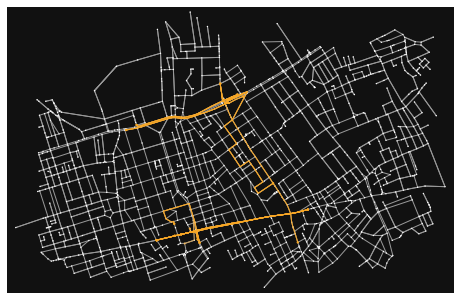

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c235710>)

In [5]:
n.plot()

You can also just plot the graph on its' own using `plot_graph`

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


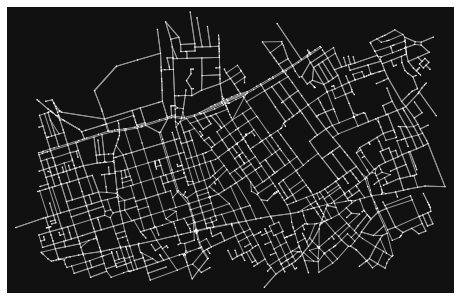

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b9df048>)

In [6]:
n.plot_graph()

And the schedule, showing stop-to-stop connections, using `plot_schedule`

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pypro

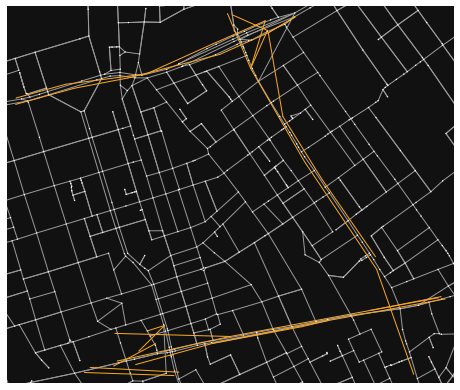

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11be1f9e8>)

In [7]:
n.plot_schedule()

We can check what kind of data is stored for nodes:

In [8]:
n.node_attribute_summary(data=True)

attribute
├── id: ['25501958', '3519133221', '25472648', '25503716', '311422343']
├── x: [528387.4250512555, 528391.4406755936, 528393.2742107178, 528396.6287644263, 528396.3513181042]
├── y: [181547.5850354673, 181552.72935927223, 181558.10532352765, 181559.970402835, 181562.0370527053]
├── lon: [-0.15178558709839862, -0.15872448710537235, -0.13569068709168342, -0.13766218709633904, -0.13543658708819173]
├── lat: [51.51609983324067, 51.5182034332405, 51.51504733324089, 51.522253033239515, 51.522948433239556]
└── s2_id: [5221390710015643649, 5221390314367946753, 5221366508477440003, 5221390682291777543, 5221390739236081673]


`s2_id` refers to [S2 Geometry](https://s2geometry.io/) id of that point. We can check what kind of data is stored for links:

In [9]:
n.link_attribute_summary(data=False)

attribute
├── id
├── from
├── to
├── freespeed
├── capacity
├── permlanes
├── oneway
├── modes
├── s2_from
├── s2_to
├── attributes
│   ├── osm:way:access
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:highway
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:id
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:name
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:relation:route
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:lanes
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:oneway
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:tunnel
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:psv
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:vehicle
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:traffic_calming
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:junction
│   │   ├── n

A MATSim network will often have additional data stored under link attributes, e.g.

```xml
<link id="1" from="1" to="2" length="3" freespeed="4" capacity="600.0" permlanes="1.0" oneway="1" modes="car" >
  <attributes>
    <attribute name="osm:way:highway" class="java.lang.String" >unclassified</attribute>
    <attribute name="osm:way:id" class="java.lang.Long" >26997928</attribute>
    <attribute name="osm:way:name" class="java.lang.String" >Brunswick Place</attribute>
  </attributes>
```

GeNet handles this as a nested `attributes` dictionary saved on the links, i.e.

In [10]:
pprint(n.link('1'))

{'attributes': {'osm:way:access': {'class': 'java.lang.String',
                                   'name': 'osm:way:access',
                                   'text': 'permissive'},
                'osm:way:highway': {'class': 'java.lang.String',
                                    'name': 'osm:way:highway',
                                    'text': 'unclassified'},
                'osm:way:id': {'class': 'java.lang.Long',
                               'name': 'osm:way:id',
                               'text': '26997928'},
                'osm:way:name': {'class': 'java.lang.String',
                                 'name': 'osm:way:name',
                                 'text': 'Brunswick Place'}},
 'capacity': 600.0,
 'freespeed': 4.166666666666667,
 'from': '25508485',
 'id': '1',
 'length': 52.765151087870265,
 'modes': {'car'},
 'oneway': '1',
 'permlanes': 1.0,
 's2_from': 5221390301001263407,
 's2_to': 5221390302696205321,
 'to': '21667818'}
